In [1]:
import sys

sys.path.append('..')
from db import DB

key_prefix = 'adfr_generated_decoys_'
keys = DB.keys(key_prefix + '*')
keys.sort()

In [2]:
DB.hgetall(keys[1])

{'error': 'False',
 'attempted': 'True',
 'finished': 'True',
 'num_protein_atoms': '257',
 'top_adfr_predicted_affinity (kcal/mol)': '-6.7',
 'ligand_file': '/usr/project/dlab/Users/jaden/pdbscreen/generated_decoy_pdbs/1/ligand.pdb',
 'total_atoms': '281',
 'num_ligand_atoms': '24',
 'output_log': '/usr/project/xtmp/yl708/adfr_benchmark_prepared/adfr_generated_decoys_1_summary.dlg',
 'protein_file': '/usr/project/dlab/Users/jaden/pdbscreen/generated_decoy_pdbs/1/protein.pdb'}

In [3]:
from functional import seq
from tqdm import tqdm

results = seq(tqdm(keys)).map(lambda x: DB.hgetall(x)).list()

  2%|▏         | 230/10000 [00:00<00:10, 910.80it/s] 

100%|██████████| 10000/10000 [00:12<00:00, 784.14it/s]


In [4]:
import pandas as pd

df = pd.DataFrame(results)

In [5]:
cleaned_df = df[df['top_adfr_predicted_affinity (kcal/mol)'].notna()]
cleaned_df

,error,ligand_file,total_atoms,attempted,num_protein_atoms,finished,top_adfr_predicted_affinity (kcal/mol),num_ligand_atoms,output_log,protein_file
0,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,492,True,453,True,-7.7,39,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
1,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,281,True,257,True,-6.7,24,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
2,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,542,True,515,True,-9.2,27,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
7,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,418,True,387,True,-9.1,31,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
8,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,374,True,337,True,-9.3,37,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
...,...,...,...,...,...,...,...,...,...,...
9994,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,384,True,361,True,-7.9,23,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
9995,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,345,True,326,True,-6.9,19,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
9997,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,419,True,378,True,-3.0,41,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...
9998,False,/usr/project/dlab/Users/jaden/pdbscreen/genera...,455,True,425,True,-7.6,30,/usr/project/xtmp/yl708/adfr_benchmark_prepare...,/usr/project/dlab/Users/jaden/pdbscreen/genera...


In [6]:

import numpy as np

# Constants
R = 8.3144621 # J/(mol*K)
T = 298.15 # K

def delta_G_to_pKd(delta_G):
    """ delta_G in kcal/mol, pKd in M
    """
    return -delta_G * 1000 / (R * T * np.log(10)) * 4.184

def pKd_to_delta_G(pKd):
    """ pKd in M, delta_G in kcal/mol
    """
    return -pKd * R * T * np.log(10) / 1000 / 4.184

def get_affinity_from_stdout(x):
    """ Gets the GNINA CNN affinity from the stdout and convert to deltaG
    """
    return pKd_to_delta_G(float(seq(x.split('\n')).filter(lambda x: 'CNNaffinity' in x).list()[0].split()[-1]))

cleaned_df['top_adfr_predicted_affinity (kcal/mol)'] = cleaned_df['top_adfr_predicted_affinity (kcal/mol)'].astype(float)

/tmp/ipykernel_3510228/3402318207.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['top_adfr_predicted_affinity (kcal/mol)'] = cleaned_df['top_adfr_predicted_affinity (kcal/mol)'].astype(float)


Text(0.5, 1.0, 'Generated decoys predicted affinities by ADFR\nn=6559, mean=-7.97, stdev=2.79')

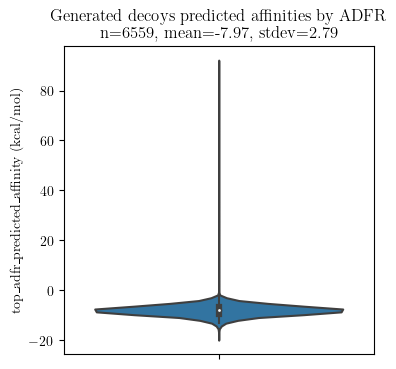

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "figure.figsize": (4, 4),
})

sns.violinplot(y='top_adfr_predicted_affinity (kcal/mol)', data=cleaned_df)
nobs, minmax, mean, variance, skewness, kurtosis = stats.describe(cleaned_df['top_adfr_predicted_affinity (kcal/mol)'])


plt.title('Generated decoys predicted affinities by ADFR\n' + f'n={nobs}, mean={mean:.2f}, stdev={np.sqrt(variance):.2f}')

In [8]:
export_df = cleaned_df[['protein_file', 'ligand_file', 'top_adfr_predicted_affinity (kcal/mol)']]
export_df

,protein_file,ligand_file,top_adfr_predicted_affinity (kcal/mol)
0,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-7.7
1,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-6.7
2,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-9.2
7,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-9.1
8,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-9.3
...,...,...,...
9994,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-7.9
9995,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-6.9
9997,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-3.0
9998,/usr/project/dlab/Users/jaden/pdbscreen/genera...,/usr/project/dlab/Users/jaden/pdbscreen/genera...,-7.6


In [9]:
export_df.to_csv('adfr_generated_decoys.csv', index=False)